In [1]:
install.packages("ISLR")

package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aabha.DESKTOP-HG6KK17\AppData\Local\Temp\RtmpAhUgqH\downloaded_packages


In [2]:
library(ISLR)

In [3]:
str(Caravan)

'data.frame':	5822 obs. of  86 variables:
 $ MOSTYPE : num  33 37 37 9 40 23 39 33 33 11 ...
 $ MAANTHUI: num  1 1 1 1 1 1 2 1 1 2 ...
 $ MGEMOMV : num  3 2 2 3 4 2 3 2 2 3 ...
 $ MGEMLEEF: num  2 2 2 3 2 1 2 3 4 3 ...
 $ MOSHOOFD: num  8 8 8 3 10 5 9 8 8 3 ...
 $ MGODRK  : num  0 1 0 2 1 0 2 0 0 3 ...
 $ MGODPR  : num  5 4 4 3 4 5 2 7 1 5 ...
 $ MGODOV  : num  1 1 2 2 1 0 0 0 3 0 ...
 $ MGODGE  : num  3 4 4 4 4 5 5 2 6 2 ...
 $ MRELGE  : num  7 6 3 5 7 0 7 7 6 7 ...
 $ MRELSA  : num  0 2 2 2 1 6 2 2 0 0 ...
 $ MRELOV  : num  2 2 4 2 2 3 0 0 3 2 ...
 $ MFALLEEN: num  1 0 4 2 2 3 0 0 3 2 ...
 $ MFGEKIND: num  2 4 4 3 4 5 3 5 3 2 ...
 $ MFWEKIND: num  6 5 2 4 4 2 6 4 3 6 ...
 $ MOPLHOOG: num  1 0 0 3 5 0 0 0 0 0 ...
 $ MOPLMIDD: num  2 5 5 4 4 5 4 3 1 4 ...
 $ MOPLLAAG: num  7 4 4 2 0 4 5 6 8 5 ...
 $ MBERHOOG: num  1 0 0 4 0 2 0 2 1 2 ...
 $ MBERZELF: num  0 0 0 0 5 0 0 0 1 0 ...
 $ MBERBOER: num  1 0 0 0 4 0 0 0 0 0 ...
 $ MBERMIDD: num  2 5 7 3 0 4 4 2 1 3 ...
 $ MBERARBG: num  5 0 0 

In [4]:
# Checking the number of customers who purchased insurance
summary(Caravan$Purchase)

No  Yes 
5474  348

In [5]:
# Checking for NA values
any(is.na(Caravan))

[1] FALSE

In [6]:
# checking the variance of column 1
var(Caravan[, 1])

# Checking the variance of column 2
var(Caravan[,2])

[1] 165.0378

[1] 0.1647078

**Clearly the scales are very different for these two columns. For KNN, it is very important to normalise the data**

In [7]:
# saving the dependent variable
purchase <- Caravan[,"Purchase"]
head(purchase)

[1] No No No No No No
Levels: No Yes

In [8]:
# standardize the independent variables. Removing 86 because that is the dependent variable
standardized.Caravan <- scale(Caravan[,-86])

In [9]:
# confirming that we have standardized the variables
print(var(standardized.Caravan[, 1]))
print(var(standardized.Caravan[, 2]))

[1] 1
[1] 1


In [10]:
# Train Test split of data
test.index <- 1:1000
test.data <- standardized.Caravan[test.index, ]
test.dependent.var <- purchase[test.index]

train.data <- standardized.Caravan[-test.index, ]
train.dependent.var <- purchase[-test.index]

In [12]:
library(class)

In [13]:
# Building KNN model
set.seed(101)

# using train.dependent.var, the model will try to predict y for test.data
predicted.y <- knn(train.data, test.data, train.dependent.var, k=1)

In [14]:
head(predicted.y)

[1] No No No No No No
Levels: No Yes

In [15]:
# Evaluate the model
misclass.err <- mean(test.dependent.var != predicted.y)

print(misclass.err)

[1] 0.116


### How to choose K value

In [16]:
# suppose we say k=3
predicted.y <- knn(train.data, test.data, train.dependent.var, k=3)

misclass.err <- mean(test.dependent.var != predicted.y)

print(misclass.err)

[1] 0.073


**The misclassification rate has come down from 11.3% to 7.3% when we choose k=3**

In [17]:
# suppose we say k=5
predicted.y <- knn(train.data, test.data, train.dependent.var, k=5)

misclass.err <- mean(test.dependent.var != predicted.y)

print(misclass.err)

[1] 0.066


In [18]:
# So now it is 6.6%. But how do we know the ideal k value? For that we will do a for loop that will run the model for different values of k

predicted.y <- NULL
err.rate <- NULL

# Setting as NULL because these are going to be vectors

for (i in 1:20){
  set.seed(101)
  predicted.y <- knn(train.data, test.data, train.dependent.var, k=i)
  
  err.rate[i] <- mean(test.dependent.var != predicted.y)
  
  
}
print(err.rate)

 [1] 0.116 0.107 0.074 0.070 0.066 0.064 0.062 0.061 0.058 0.058 0.059 0.058
[13] 0.059 0.059 0.059 0.059 0.059 0.059 0.059 0.059


In [19]:
# visualize using K Elbow method

library(ggplot2)
k.values <- 1:20
error.df <- data.frame(err.rate, k.values)
error.df

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


err.rate,k.values
0.116,1
0.107,2
0.074,3
0.070,4
0.066,5
0.064,6
0.062,7
0.061,8
0.058,9
0.058,10


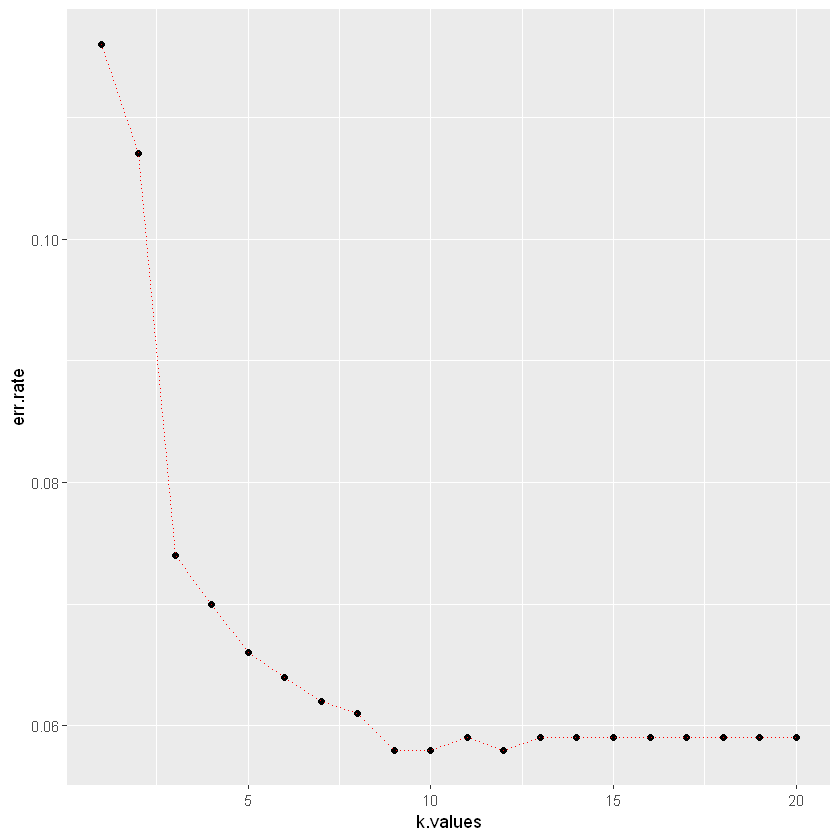

In [20]:
ggplot(error.df, aes(x=k.values, y=err.rate)) + geom_point() + geom_line(lty = 'dotted', color ='red')

**It looks like after k=9, misclass rate flat lines. so that's where our elbow lies. So we will choose k = 9 as our ideal value.**

In [21]:
predicted.y <- knn(train.data, test.data, train.dependent.var, k=9)

misclass.err <- mean(test.dependent.var != predicted.y)

print(misclass.err)

[1] 0.058


In [22]:
head(predicted.y, 10)

[1] No No No No No No No No No No
Levels: No Yes